In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the "../input/" directory.

import os
print(os.listdir("../input"))

['AppleStore.csv', 'appleStore_description.csv']


In [98]:
print(os.listdir('..'))
df = pd.read_csv('../input/AppleStore.csv')

['working', 'config', 'lib', 'input']


In [99]:
df.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Documentation for dataset. Taken from https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

"id" : App ID

"track_name": App Name

"size_bytes": Size (in Bytes)

"currency": Currency Type

"price": Price amount

"rating_count_tot": User Rating counts (for all version)

"rating_count_ver": User Rating counts (for current version)

"user_rating" : Average User Rating value (for all version)

"user_rating_ver": Average User Rating value (for current version)

"ver" : Latest version code

"cont_rating": Content Rating

"prime_genre": Primary Genre

"sup_devices.num": Number of supporting devices

"ipadSc_urls.num": Number of screenshots showed for display

"lang.num": Number of supported languages

"vpp_lic": Vpp Device Based Licensing Enabled

In [100]:
df.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


**Looking at price vs rating of apps:**

Text(0.5, 1.0, 'Average price and rating by app category')

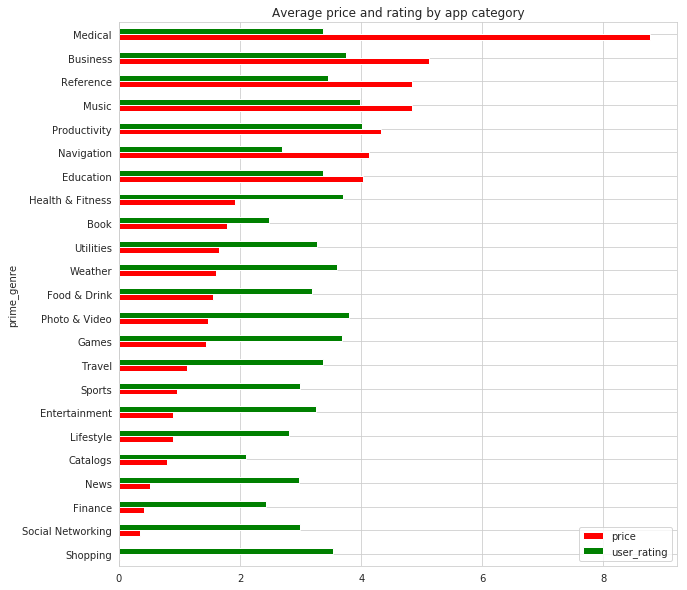

In [101]:
df.groupby(by='prime_genre')['price','user_rating'].mean().sort_values(by='price')\
.plot(kind='barh',figsize=(10,10),color=['r','g'])
plt.legend()
plt.title('Average price and rating by app category')

**How is price and rating correlated?**

In [102]:
df_price_rating = df[['price','user_rating']].corr()
print(df_price_rating)

                price  user_rating
price        1.000000     0.046601
user_rating  0.046601     1.000000


**Basically not correlated at all with correlation of ~0.04**

Number of paid apps:  2885


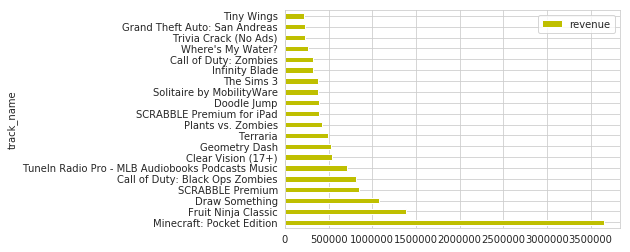

In [103]:
#add a revenue column using the app-rating count, not the total revenue as only number of reviews count
# probably not particularly good metric, treat with caution...

df['revenue'] = df['price'] * df['rating_count_tot']
df_revenue = df[['track_name','revenue']].sort_values(by='revenue',ascending=False)
df_revenue = df_revenue[df_revenue.revenue > 0]
print('Number of paid apps: ',(df_revenue.shape[0]))
df_revenue.set_index('track_name',inplace=True)
df_revenue.head(20).plot(kind='barh',color='y')

*Minecraft has by far the highest estimated minimum revenue (based on number of ratings and price.*

**Hypothesis: Are paid apps higher rated than unpaid apps?**

In [104]:
from scipy import stats

In [105]:
ratings_paid_apps = df[df.price > 0].user_rating
ratings_free_apps = df[df.price == 0].user_rating

In [106]:
#take only the ratings of paid and the ratings of free apps:
paid_rating_mean = ratings_paid_apps.mean()
free_rating_mean = ratings_free_apps.mean()

print('Mean rating for paid apps: ', paid_rating_mean)
print('Mean rating for free apps: ', free_rating_mean)

Mean rating for paid apps:  3.720948742438714
Mean rating for free apps:  3.3767258382642997


We can see that paid apps are on average rated higher than free apps.

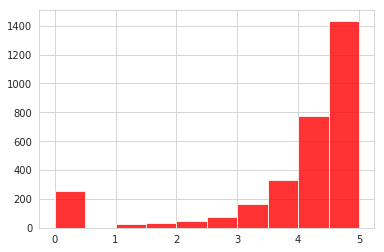

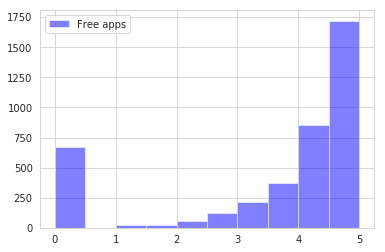

In [107]:
#check the distributions:
plt.figure()
ratings_paid_apps.hist(alpha=0.8,label='Paid apps',color='r')

plt.figure()
ratings_free_apps.hist(alpha=0.5,label='Free apps',color='b')
plt.legend()

In [108]:
#independent t-test to check if there is a statistically significant difference.
#independent t-test was chosen as we are comparing two groups of the same population.
t_value, p_value = stats.ttest_ind(ratings_paid_apps,ratings_free_apps)
print('T-value: ',t_value)
print('P-value: ',"{:.20f}".format(float(p_value)))

T-value:  9.601175857741767
P-value:  0.00000000000000000000


With a p-value of basically 0 and a t-value of ~9.6 we can establish that there is a significant difference between the two groups.

**How do factors like number of screenshots, or supported devices affect ratings or revenue?**

In [118]:
cm = sns.light_palette("green", as_cmap=True)
df_corr = df.corr()
df_columns = df.columns.values
df_corr.style.background_gradient(cmap=cm, subset=df_columns)

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,revenue
Unnamed: 0,1,0.910714,0.0412774,-0.0743258,-0.16864,-0.0647173,-0.204867,-0.12758,0.0246477,0.0145888,-0.148487,0.000501016,-0.100087
id,0.910714,1,0.0774862,-0.075247,-0.201976,-0.0727836,-0.185178,-0.109849,0.0336049,0.0520818,-0.128932,0.0177433,-0.1214
size_bytes,0.0412774,0.0774862,1,0.182392,0.00448632,0.00633717,0.0662557,0.0860747,-0.118347,0.152697,0.00461435,-0.150418,0.0241069
price,-0.0743258,-0.075247,0.182392,1,-0.0390442,-0.0180118,0.046601,0.0251733,-0.115361,0.0660996,-0.00671336,-0.0299425,0.0773258
rating_count_tot,-0.16864,-0.201976,0.00448632,-0.0390442,1,0.163645,0.08331,0.0887435,0.00883232,0.0157343,0.137675,-0.000982323,0.156085
rating_count_ver,-0.0647173,-0.0727836,0.00633717,-0.0180118,0.163645,1,0.0687541,0.0778401,0.0379507,0.024333,0.0132869,0.00646047,0.0850576
user_rating,-0.204867,-0.185178,0.0662557,0.046601,0.08331,0.0687541,1,0.77414,-0.0424515,0.265671,0.170976,0.0698165,0.049896
user_rating_ver,-0.12758,-0.109849,0.0860747,0.0251733,0.0887435,0.0778401,0.77414,1,-0.0189007,0.275737,0.17558,0.0500942,0.0490372
sup_devices.num,0.0246477,0.0336049,-0.118347,-0.115361,0.00883232,0.0379507,-0.0424515,-0.0189007,1,-0.0377276,-0.0416811,-0.037109,0.00458763
ipadSc_urls.num,0.0145888,0.0520818,0.152697,0.0660996,0.0157343,0.024333,0.265671,0.275737,-0.0377276,1,0.0883784,0.0719005,-0.00565313
